In [1]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
report_dir = "TPKLM"
df_tmp = pd.read_csv("../reports/"+report_dir+"/resource_utils.csv")

In [3]:
df_tmp.head()

start_timestamp        cpu_percent_percpu  cpu_percent  ram_total_bytes  \
0     1.641826e+09  [83.6, 83.6, 83.2, 83.3]       83.425       1805066240   
1     1.641826e+09  [84.0, 85.7, 85.1, 83.8]       84.650       1822404608   
2     1.641826e+09  [83.5, 86.2, 84.0, 84.4]       84.525       1834147840   
3     1.641826e+09  [84.9, 84.8, 83.5, 84.6]       84.450       1825492992   
4     1.641826e+09  [83.0, 83.1, 84.2, 82.6]       83.225       1826271232   

   io_read_bytes  io_write_bytes  ram_percent     timestamp  
0     5203682304     13393810432         27.5  1.641826e+09  
1     5214381056     13393810432         27.7  1.641826e+09  
2     5214381056     13393810432         27.9  1.641826e+09  
3     5214381056     13393810432         27.8  1.641826e+09  
4     5214381056     13393810432         27.8  1.641826e+09

In [4]:
df_tmp["io_read_gb"] = df_tmp["io_read_bytes"]/ (1024**3)
df_tmp["io_write_gb"] = df_tmp["io_write_bytes"]/ (1024**3)
df_tmp.head()

start_timestamp        cpu_percent_percpu  cpu_percent  ram_total_bytes  \
0     1.641826e+09  [83.6, 83.6, 83.2, 83.3]       83.425       1805066240   
1     1.641826e+09  [84.0, 85.7, 85.1, 83.8]       84.650       1822404608   
2     1.641826e+09  [83.5, 86.2, 84.0, 84.4]       84.525       1834147840   
3     1.641826e+09  [84.9, 84.8, 83.5, 84.6]       84.450       1825492992   
4     1.641826e+09  [83.0, 83.1, 84.2, 82.6]       83.225       1826271232   

   io_read_bytes  io_write_bytes  ram_percent     timestamp  io_read_gb  \
0     5203682304     13393810432         27.5  1.641826e+09    4.846307   
1     5214381056     13393810432         27.7  1.641826e+09    4.856271   
2     5214381056     13393810432         27.9  1.641826e+09    4.856271   
3     5214381056     13393810432         27.8  1.641826e+09    4.856271   
4     5214381056     13393810432         27.8  1.641826e+09    4.856271   

   io_write_gb  
0    12.473958  
1    12.473958  
2    12.473958  
3    12.473958  
4    12.473958

In [5]:
np.array([eval(i) for i in df_tmp["cpu_percent_percpu"].values.tolist()])

array([[83.6, 83.6, 83.2, 83.3],
       [84. , 85.7, 85.1, 83.8],
       [83.5, 86.2, 84. , 84.4],
       [84.9, 84.8, 83.5, 84.6],
       [83. , 83.1, 84.2, 82.6],
       [84.5, 83.5, 85.4, 84.5],
       [84.5, 82.8, 83.3, 85.3],
       [83.7, 84. , 85.4, 82.3],
       [85.1, 85.3, 84.5, 83.1],
       [84.5, 83. , 83.9, 86.6],
       [89.1, 83.7, 85.6, 84.9],
       [88.3, 88.5, 88.4, 90. ],
       [86.5, 84.2, 83.9, 85.4],
       [88.7, 88.5, 88.7, 87.5],
       [85.4, 86.5, 87.8, 84.8],
       [85.4, 85.4, 86.3, 83.2],
       [85.9, 85.1, 86. , 84.7],
       [83.7, 84.2, 82.4, 80.9],
       [85.6, 84.5, 86. , 83.1],
       [84. , 82.8, 84.8, 84. ],
       [90.7, 87. , 88.3, 87.6],
       [85.4, 87.8, 87.6, 92.9],
       [85. , 84. , 83.9, 84.2],
       [85.1, 83.7, 82. , 86.7],
       [84.9, 85.4, 83.5, 84.2],
       [83.5, 83.5, 83.5, 84.4],
       [84.2, 83.5, 84.4, 84. ],
       [84.6, 83.9, 83.2, 82.8],
       [85.9, 83.7, 86. , 83.2],
       [84.7, 83. , 84.4, 84. ],
       [84

<AxesSubplot:xlabel='timestamp', ylabel='io_read_gb'>

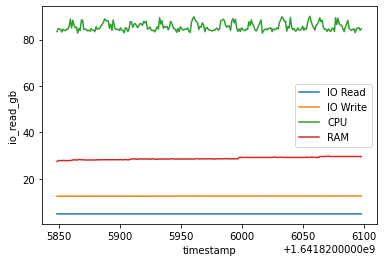

In [6]:
plt.figure()
sns.lineplot(x="timestamp", y="io_read_gb", data=df_tmp, label="IO Read")
sns.lineplot(x="timestamp", y="io_write_gb", data=df_tmp, label="IO Write")
sns.lineplot(x="timestamp", y="cpu_percent", data=df_tmp, label="CPU")
sns.lineplot(x="timestamp", y="ram_percent", data=df_tmp, label="RAM")

In [7]:
cpu_percent_percpu = np.array([eval(i) for i in df_tmp["cpu_percent_percpu"].values.tolist()])
cpu_percent_percpu.shape

(250, 4)

In [8]:
cpu_percent_percpu.mean()

85.4944

In [9]:
time_stamp = df_tmp["timestamp"].values
time_stamp.shape

(250,)

In [10]:
cpu_percent_percpu = np.array([eval(i) for i in df_tmp["cpu_percent_percpu"].values.tolist()])
df_tmp["cpu_percent_percpu"].values

array(['[83.6, 83.6, 83.2, 83.3]', '[84.0, 85.7, 85.1, 83.8]',
       '[83.5, 86.2, 84.0, 84.4]', '[84.9, 84.8, 83.5, 84.6]',
       '[83.0, 83.1, 84.2, 82.6]', '[84.5, 83.5, 85.4, 84.5]',
       '[84.5, 82.8, 83.3, 85.3]', '[83.7, 84.0, 85.4, 82.3]',
       '[85.1, 85.3, 84.5, 83.1]', '[84.5, 83.0, 83.9, 86.6]',
       '[89.1, 83.7, 85.6, 84.9]', '[88.3, 88.5, 88.4, 90.0]',
       '[86.5, 84.2, 83.9, 85.4]', '[88.7, 88.5, 88.7, 87.5]',
       '[85.4, 86.5, 87.8, 84.8]', '[85.4, 85.4, 86.3, 83.2]',
       '[85.9, 85.1, 86.0, 84.7]', '[83.7, 84.2, 82.4, 80.9]',
       '[85.6, 84.5, 86.0, 83.1]', '[84.0, 82.8, 84.8, 84.0]',
       '[90.7, 87.0, 88.3, 87.6]', '[85.4, 87.8, 87.6, 92.9]',
       '[85.0, 84.0, 83.9, 84.2]', '[85.1, 83.7, 82.0, 86.7]',
       '[84.9, 85.4, 83.5, 84.2]', '[83.5, 83.5, 83.5, 84.4]',
       '[84.2, 83.5, 84.4, 84.0]', '[84.6, 83.9, 83.2, 82.8]',
       '[85.9, 83.7, 86.0, 83.2]', '[84.7, 83.0, 84.4, 84.0]',
       '[84.8, 84.9, 83.3, 83.2]', '[83.2, 83.2, 84.4, 

In [11]:
from beautifultable import BeautifulTable, BTColumnCollection, BTRowCollection
cpu_core_per = np.array([eval(i) for i in df_tmp["cpu_percent_percpu"].values.tolist()])
cpu_cores = cpu_core_per.shape[1]
cpu_core_header = ["cpu_"+str(i) for i in range(cpu_cores)]

table_cpu = BeautifulTable()
table_cpu.column_headers = [""] + cpu_core_header
table_cpu.append_row(['Average %']+[float(cpu_core_per[:,j].mean()) for j in range(cpu_cores)])
table_cpu.append_row(['Maximum %']+[float(cpu_core_per[:,j].max()) for j in range(cpu_cores)])
table_cpu.append_row(['Minimum %']+[float(cpu_core_per[:,j].min()) for j in range(cpu_cores)])
print(str(table_cpu))

+-----------+--------+--------+-------+--------+
|           | cpu_0  | cpu_1  | cpu_2 | cpu_3  |
+-----------+--------+--------+-------+--------+
| Average % | 85.563 | 85.224 | 85.78 | 85.411 |
+-----------+--------+--------+-------+--------+
| Maximum % |  93.9  |  91.8  | 93.9  |  94.1  |
+-----------+--------+--------+-------+--------+
| Minimum % |  82.0  |  81.8  | 82.0  |  80.9  |
+-----------+--------+--------+-------+--------+


/home/sunil/DaveAIProjects/dave-kiosk-testing/.venv/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/home/sunil/DaveAIProjects/dave-kiosk-testing/.venv/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


<AxesSubplot:>

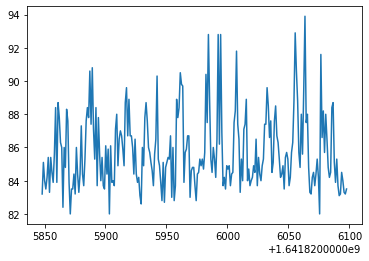

In [12]:
sns.lineplot(x=time_stamp, y=cpu_percent_percpu[:,2])

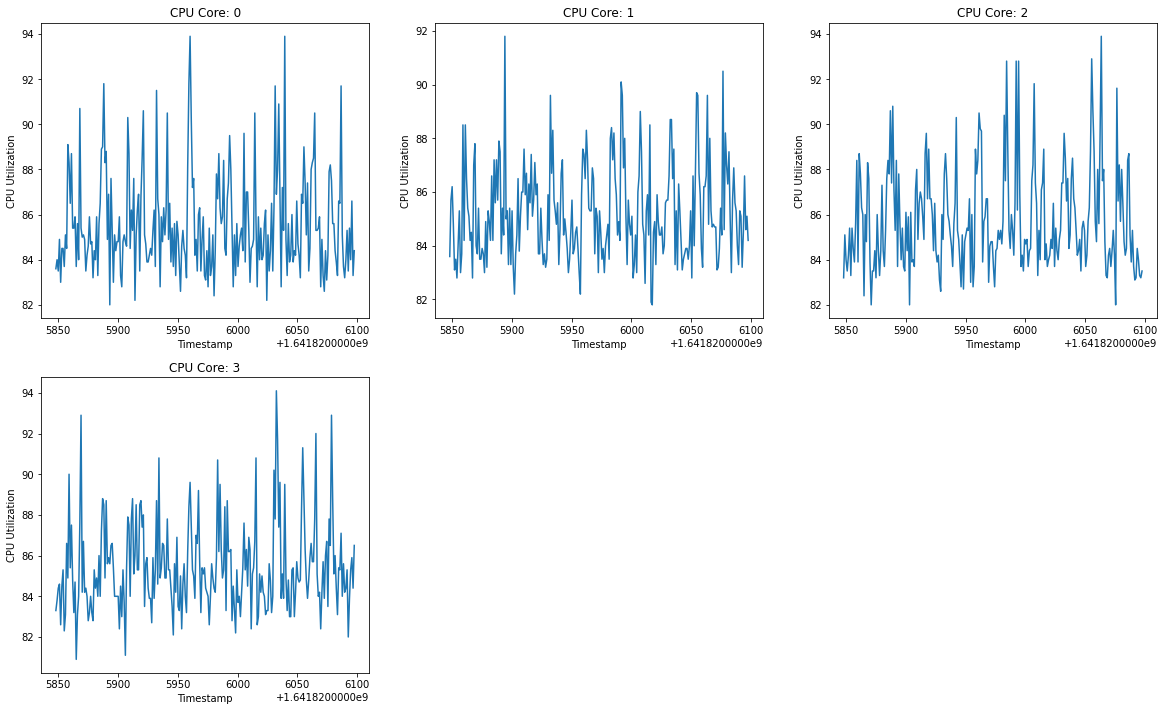

In [14]:
fig = plt.figure(figsize=(20,25), facecolor='white')
main_shape = cpu_percent_percpu.shape
for i in range(4):
    plt.subplot(4,3,i+1)
    ax = sns.lineplot(x=time_stamp, y=cpu_percent_percpu[:,i])
    ax.set_title("CPU Core: {}".format(i))
    ax.set_xlabel("Timestamp")
    ax.set_ylabel("CPU Utilization")
plt.savefig("cpu_cores_plots.png", facecolor="white", bbox_inches='tight', transparent=True, pad_inches=1)

**Average CPU Utilisation:**

In [4]:
df_tmp["cpu_percent"].mean()

68.70666666666666

**Average RAM Utilisation:**

In [5]:
df_tmp["ram_percent"].mean()

43.18

**Max CPU Utilisation:**

In [6]:
df_tmp["cpu_percent"].max()

74.5

**Max RAM Utilisation:**

In [7]:
df_tmp["ram_percent"].max()

45.9

<AxesSubplot:xlabel='timestamp', ylabel='cpu_percent'>

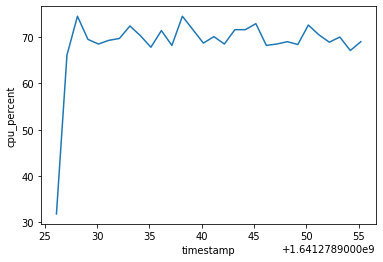

In [8]:
plt.figure()
sns.lineplot(x="timestamp", y="cpu_percent", data=df_tmp)

<AxesSubplot:xlabel='timestamp', ylabel='ram_percent'>

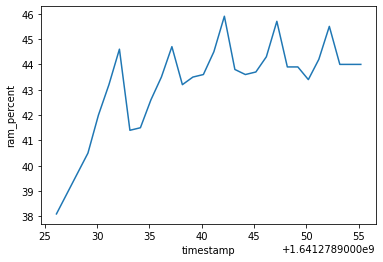

In [9]:
plt.figure()
sns.lineplot(x="timestamp", y="ram_percent", data=df_tmp)